In [1]:
#package for read data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data file
df = pd.read_csv("heart_disease.csv")

In [3]:
#import the decision tree package, Machine learning Algorithm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#checking the data is correct or not
print(df.shape)

(303, 14)


In [5]:
#print the data from csv file
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#rename the data of the column from shortform name
df.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achived', 
            'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemla', 'target']

In [7]:
#checking the data is completed changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achived   303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemla              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
#redefining categorical variables for better understanding
#that is not error is just warning that value is trying to be set on a copy of a slice from a DataFrame

df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-angina pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemla'][df['thalassemla'] == 1] = 'normal'
df['thalassemla'][df['thalassemla'] == 2] = 'fixed defect'
df['thalassemla'][df['thalassemla'] == 3] = 'reversable defect'

C:\Users\CHENG\AppData\Local\Temp\ipykernel_15040\3077546556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'female'
C:\Users\CHENG\AppData\Local\Temp\ipykernel_15040\3077546556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
C:\Users\CHENG\AppData\Local\Temp\ipykernel_15040\3077546556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [9]:
#check again the data is in object
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                     int64
max_heart_rate_achived       int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemla                 object
target                       int64
dtype: object

In [10]:
#categerical variables
#to convert data in right format
obj_cats = ['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope', 'num_major_vessels', 'thalassemla']

for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [11]:
#checking the object is in category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      303 non-null    int64   
 1   sex                      303 non-null    category
 2   chest_pain_type          303 non-null    category
 3   resting_blood_pressure   303 non-null    int64   
 4   cholesterol              303 non-null    int64   
 5   fasting_blood_sugar      303 non-null    category
 6   rest_ecg                 303 non-null    int64   
 7   max_heart_rate_achived   303 non-null    int64   
 8   exercise_induced_angina  303 non-null    category
 9   st_depression            303 non-null    float64 
 10  st_slope                 303 non-null    category
 11  num_major_vessels        303 non-null    category
 12  thalassemla              303 non-null    category
 13  target                   303 non-null    int64   
dtypes: categor

In [12]:
#creating dummies for the data
df = pd.get_dummies(df, drop_first=True)

In [13]:
#checking data and read data
df.head()

,age,resting_blood_pressure,cholesterol,rest_ecg,max_heart_rate_achived,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,...,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemla_fixed defect,thalassemla_normal,thalassemla_reversable defect
0,63,145,233,0,150,2.3,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,37,130,250,1,187,3.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,41,130,204,0,172,1.4,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,120,236,1,178,0.8,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,120,354,1,163,0.6,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0


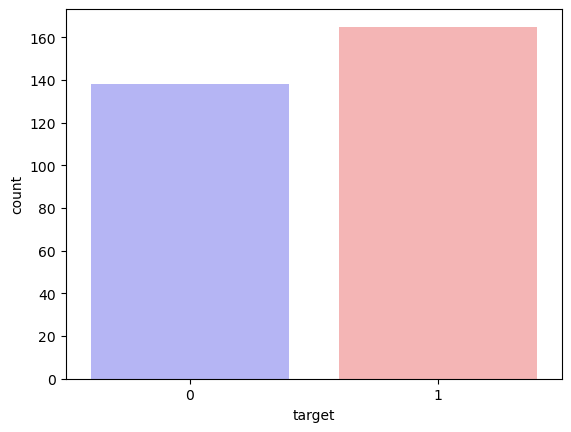

In [14]:
#visualisation the data
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [15]:
#then defining attributes and target variable of the data
X = df.drop(['target'], axis=1)
y = df['target']

In [16]:
#the we need splitting the data for doing modeling into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



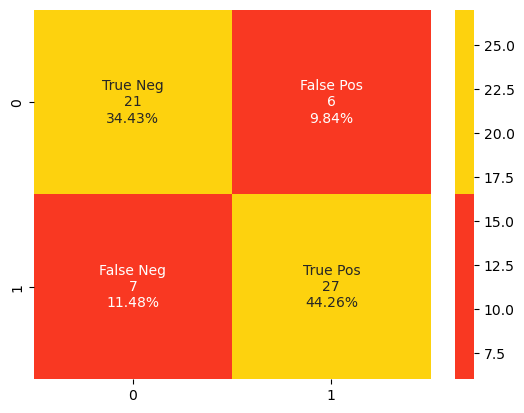

In [17]:
colors = ['#F93822','#FDD20E']


 
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
#roc = roc_auc_score(Y_test, y_proba_knn[:,1])
    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
    
# Labelling the matrix
names = ['True Neg','False Pos','False Neg','True Pos']
    
# Counts of the test data and labelling it on the matrix
counts = [value for value in cm.flatten()]
    
# Get the % of the grand total on the matrix
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
# Classification Report
print(classification_report(y_test, y_pred))